# Part I - Data Expo 2009: Airline on time data
## by Joseph Abang

## Introduction
> The Graphics Section and Computing Section sponsor a unique Poster Session at The Joint Statistical Meetings every two years called The Data Exposition. The data includes arrival and departure information for all scheduled domestic flights between October 1987 and April 2008. Every commercial flight within the United States between October 1987 and April 2008 is represented by arrival and departure data.I used a sample of 200,000 records from each year between 1987 and 2008 of the dataset already on Kaggle that can be found here (https://www.kaggle.com/datasets/wenxingdi/data-expo-2009-airline-on-time-data), this is the dataset used in the first notebook (exploratory-analysis).

## Preliminary Wrangling

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [2]:
# Creating a list of files for iteration
file_names = ['/kaggle/input/data-expo-2009-airline-on-time-data/2008.csv',
              '/kaggle/input/data-expo-2009-airline-on-time-data/1989.csv',
              '/kaggle/input/data-expo-2009-airline-on-time-data/1992.csv',
              '/kaggle/input/data-expo-2009-airline-on-time-data/1991.csv',
              '/kaggle/input/data-expo-2009-airline-on-time-data/2006.csv',
              '/kaggle/input/data-expo-2009-airline-on-time-data/2003.csv',
              '/kaggle/input/data-expo-2009-airline-on-time-data/1995.csv',
              '/kaggle/input/data-expo-2009-airline-on-time-data/2000.csv',
              '/kaggle/input/data-expo-2009-airline-on-time-data/1998.csv',
              '/kaggle/input/data-expo-2009-airline-on-time-data/1997.csv',
              '/kaggle/input/data-expo-2009-airline-on-time-data/1990.csv',
              '/kaggle/input/data-expo-2009-airline-on-time-data/1988.csv',
              '/kaggle/input/data-expo-2009-airline-on-time-data/2004.csv',
              '/kaggle/input/data-expo-2009-airline-on-time-data/2002.csv',
              '/kaggle/input/data-expo-2009-airline-on-time-data/1993.csv',
              '/kaggle/input/data-expo-2009-airline-on-time-data/1987.csv',
              '/kaggle/input/data-expo-2009-airline-on-time-data/2001.csv',
              '/kaggle/input/data-expo-2009-airline-on-time-data/2005.csv',
              '/kaggle/input/data-expo-2009-airline-on-time-data/1999.csv',
              '/kaggle/input/data-expo-2009-airline-on-time-data/1996.csv',
              '/kaggle/input/data-expo-2009-airline-on-time-data/1994.csv',
              '/kaggle/input/data-expo-2009-airline-on-time-data/2007.csv']

Due to the size and amount of datafiles, a very high amount of memory is needed to successfully read and concatenate into a dataframe. A solution to take a definite sample sized data from each file and create a dataframe. 

In [3]:
# Read csv files and define sample size
# concatenate to dataframe

np.random.seed(34)

flight_df = pd.concat((pd.read_csv(f,low_memory=False, encoding='iso-8859-1').sample(n=200000) for f in file_names), ignore_index = True)


In [4]:
 # Overview of dataframe 
print(flight_df.info())
print('Shape::{}\n'.format(flight_df.shape))
flight_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4400000 entries, 0 to 4399999
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           float64
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,4,7,1,955.0,950,1232.0,1229,XE,501,...,3.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,4,30,3,1429.0,1420,1657.0,1655,WN,321,...,4.0,15.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,4,28,1,1842.0,1535,2138.0,1830,DL,1786,...,12.0,24.0,0,NaN,0,0.0,0.0,144.0,0.0,44.0
3,2008,4,6,7,1722.0,1720,1811.0,1817,EV,4532,...,10.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,16,3,1220.0,1218,1322.0,1316,DL,983,...,9.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4399995,2007,2,17,6,1515.0,1525,1605.0,1620,YV,2617,...,8.0,7.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4399996,2007,6,4,1,1116.0,1055,1144.0,1130,MQ,4151,...,6.0,8.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4399997,2007,9,16,7,1341.0,1341,1521.0,1522,NW,1570,...,3.0,14.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4399998,2007,5,22,2,1458.0,1500,1735.0,1745,WN,817,...,3.0,6.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0


After viewing the head of the dataframe, there are evidently unnecessary columns for this analysis that need to be droppped. 

In [5]:
# Assign list of unnecssary columns
# Drop unnecessary columns 
drop_list = ['FlightNum', 'TailNum','TaxiIn', 'TaxiOut', 'CancellationCode','CarrierDelay','WeatherDelay',
             'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

flight_df.drop(drop_list, axis=1, inplace=True)

In [6]:
# Test
flight_df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'Cancelled', 'Diverted'],
      dtype='object')

In [7]:
# Check for null and duplicated values
print(flight_df.isnull().sum())
print('Number of duplcated values: ' + str(flight_df.duplicated().sum()))

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                82355
CRSDepTime                 0
ArrTime                92523
CRSArrTime                 0
UniqueCarrier              0
ActualElapsedTime      92523
CRSElapsedTime          1037
AirTime              1667579
ArrDelay               92523
DepDelay               82355
Origin                     0
Dest                       0
Distance                7844
Cancelled                  0
Diverted                   0
dtype: int64
Number of duplcated values: 42


In [8]:
# Drop null values
flight_df.dropna(inplace=True)
flight_df.isnull().sum() # Test

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
Cancelled            0
Diverted             0
dtype: int64

In [9]:
# Drop duplicates
flight_df.drop_duplicates(inplace=True)
print('Number of duplcated values: ' + str(flight_df.duplicated().sum())) # Test

Number of duplcated values: 0


In [10]:
print(flight_df.info())
print('Shape::{}\n'.format(flight_df.shape))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2730250 entries, 0 to 4399999
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   ActualElapsedTime  float64
 10  CRSElapsedTime     float64
 11  AirTime            float64
 12  ArrDelay           float64
 13  DepDelay           float64
 14  Origin             object 
 15  Dest               object 
 16  Distance           float64
 17  Cancelled          int64  
 18  Diverted           int64  
dtypes: float64(8), int64(8), object(3)
memory usage: 416.6+ MB
None
Shape::(2730250, 19)



`Year` `Month` and `DayofMonth` columns should be one datetime column. 

In [11]:
# Join Year, Month and Day columns into one column
flight_df['Date'] = flight_df.DayofMonth.astype(str) + '/' + flight_df.Month.astype(str) + '/' + flight_df.Year.astype(str)

flight_df.Date

0           7/4/2008
1          30/4/2008
2          28/4/2008
3           6/4/2008
4          16/1/2008
             ...    
4399995    17/2/2007
4399996     4/6/2007
4399997    16/9/2007
4399998    22/5/2007
4399999    20/7/2007
Name: Date, Length: 2730250, dtype: object

In [12]:
# Convert date column to datetime type
flight_df.Date = pd.to_datetime(flight_df['Date'], dayfirst=True)

# Create a weekend dummy variable using DayofWeek column
flight_df['is_weekend'] = (flight_df['Date'].dt.weekday >= 5).astype(int)

In [13]:
flight_df.head()    

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,Date,is_weekend
0,2008,4,7,1,955.0,950,1232.0,1229,XE,97.0,...,74.0,3.0,5.0,ABQ,SAT,609.0,0,0,2008-04-07,0
1,2008,4,30,3,1429.0,1420,1657.0,1655,WN,268.0,...,249.0,2.0,9.0,MDW,OAK,1844.0,0,0,2008-04-30,0
2,2008,4,28,1,1842.0,1535,2138.0,1830,DL,176.0,...,140.0,188.0,187.0,FLL,LGA,1076.0,0,0,2008-04-28,0
3,2008,4,6,7,1722.0,1720,1811.0,1817,EV,49.0,...,31.0,-6.0,2.0,ABY,ATL,146.0,0,0,2008-04-06,1
4,2008,1,16,3,1220.0,1218,1322.0,1316,DL,62.0,...,37.0,6.0,2.0,ATL,SAV,215.0,0,0,2008-01-16,0


Dummy Variables open way to better analysis with columns. 

In [14]:
# Create dummy variable for late arrival and departure
# A flight is late when arrival or departure is 15 minutes or more after the scheduled time.

# Late Arrivals
flight_df['Late_Arr'] = (flight_df['ArrDelay'] >=15).astype('int')

# Late Departure
flight_df['Late_Dep'] = (flight_df['DepDelay'] >=15).astype('int')


In [15]:
# Percentage error in elapsed time (Dummy Variable)
flight_df['ElapsedTime_percnt_error'] = ((flight_df['CRSElapsedTime']-flight_df['ActualElapsedTime'])/flight_df['ActualElapsedTime'])*100

At this point, the `Date` column gives a great foundation for time trend analysis. Other date related columns not needed for this analysis can be dropped. 

In [16]:
# Drop unnecessary columns 
drop_cols = ['Year','Month','DayofMonth','ArrTime','CRSArrTime', 'DepTime', 'CRSDepTime','DayOfWeek', 'ArrDelay','DepDelay', 'Cancelled', 'Diverted','ActualElapsedTime','CRSElapsedTime']
flight_df.drop(drop_cols, axis=1, inplace=True)

In [17]:
# Reviewiewng columns
flight_df.info()
flight_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2730250 entries, 0 to 4399999
Data columns (total 10 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   UniqueCarrier             object        
 1   AirTime                   float64       
 2   Origin                    object        
 3   Dest                      object        
 4   Distance                  float64       
 5   Date                      datetime64[ns]
 6   is_weekend                int64         
 7   Late_Arr                  int64         
 8   Late_Dep                  int64         
 9   ElapsedTime_percnt_error  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 229.1+ MB


,UniqueCarrier,AirTime,Origin,Dest,Distance,Date,is_weekend,Late_Arr,Late_Dep,ElapsedTime_percnt_error
0,XE,74.0,ABQ,SAT,609.0,2008-04-07,0,0,0,2.061856
1,WN,249.0,MDW,OAK,1844.0,2008-04-30,0,0,0,2.611940
2,DL,140.0,FLL,LGA,1076.0,2008-04-28,0,1,1,-0.568182
3,EV,31.0,ABY,ATL,146.0,2008-04-06,1,0,0,16.326531
4,DL,37.0,ATL,SAV,215.0,2008-01-16,0,0,0,-6.451613


In [18]:
flight_df.describe()

,AirTime,Distance,is_weekend,Late_Arr,Late_Dep,ElapsedTime_percnt_error
count,2.730250e+06,2.730250e+06,2.730250e+06,2.730250e+06,2.730250e+06,2.730250e+06
mean,1.027800e+02,7.300225e+02,2.681077e-01,2.126893e-01,1.765267e-01,2.253103e+00
std,7.056224e+01,5.623317e+02,4.429741e-01,4.092098e-01,3.812677e-01,1.092136e+01
min,-2.593000e+03,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+02
25%,5.400000e+01,3.250000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-3.370787e+00
50%,8.400000e+01,5.760000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.515723e+00
75%,1.330000e+02,9.640000e+02,1.000000e+00,0.000000e+00,0.000000e+00,8.333333e+00
max,1.651000e+03,4.962000e+03,1.000000e+00,1.000000e+00,1.000000e+00,5.500000e+02


In [19]:
# Rearrange column headers 
cols = ['Origin','Dest','UniqueCarrier','Distance','Date', 'AirTime','Late_Arr', 'Late_Dep','is_weekend', 'ElapsedTime_percnt_error']
flight_df = flight_df[cols]



On observing the description of `DayOfWeek` column, it would be best to represent each numeric value with days of the week. 

In [20]:
flight_df.sort_values(by='Date',inplace=True)

In [21]:
flight_df.head(10)

,Origin,Dest,UniqueCarrier,Distance,Date,AirTime,Late_Arr,Late_Dep,is_weekend,ElapsedTime_percnt_error
1208077,BOS,BWI,US,370.0,1995-01-01,75.0,1,0,1,-15.789474
1325076,DEN,DFW,AA,641.0,1995-01-01,87.0,0,0,1,12.931034
1352984,MSP,LAX,NW,1536.0,1995-01-01,195.0,0,0,1,4.444444
1298840,DTW,PIT,NW,201.0,1995-01-01,44.0,1,1,1,6.557377
1247667,RDU,BNA,AA,443.0,1995-01-01,79.0,0,0,1,0.000000
1399473,ELP,PHX,WN,347.0,1995-01-01,54.0,0,0,1,12.903226
1275423,CLT,CAE,US,88.0,1995-01-01,26.0,0,0,1,-11.627907
1290343,BHM,ATL,DL,134.0,1995-01-01,32.0,0,0,1,-2.173913
1242639,IAH,SAT,CO,191.0,1995-01-01,32.0,0,1,1,36.585366
1325051,MCI,CLT,US,809.0,1995-01-01,92.0,0,0,1,12.149533


In [22]:
flight_df.sample(20)

,Origin,Dest,UniqueCarrier,Distance,Date,AirTime,Late_Arr,Late_Dep,is_weekend,ElapsedTime_percnt_error
3866159,HOU,PHX,WN,1020.0,1996-01-14,148.0,0,0,1,6.451613
2608305,PIT,ATL,US,526.0,2002-03-28,78.0,1,1,0,8.080808
3761395,STL,MSY,TW,604.0,1999-02-05,82.0,0,0,0,1.834862
145956,ALB,ATL,EV,852.0,2008-03-03,146.0,0,0,0,-6.214689
807343,ATL,MDT,EV,619.0,2006-03-24,87.0,0,0,0,-6.896552
1576510,ROC,ORD,UA,528.0,2000-10-21,80.0,0,0,1,10.101010
2499623,SAT,HOU,WN,192.0,2004-12-29,35.0,0,0,0,-10.000000
999917,CLT,LGA,US,544.0,2006-05-06,81.0,0,0,1,1.904762
108219,SFO,LAX,UA,337.0,2008-02-04,55.0,0,0,0,-1.075269
907366,DCA,JFK,MQ,213.0,2006-11-22,44.0,0,0,0,16.666667


In [23]:
# Save rangled dataframe
flight_df.to_csv('flights_data_wrangled', index=False)

In [24]:
flights=pd.read_csv('./flights_data_wrangled')

In [25]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730250 entries, 0 to 2730249
Data columns (total 10 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Origin                    object 
 1   Dest                      object 
 2   UniqueCarrier             object 
 3   Distance                  float64
 4   Date                      object 
 5   AirTime                   float64
 6   Late_Arr                  int64  
 7   Late_Dep                  int64  
 8   is_weekend                int64  
 9   ElapsedTime_percnt_error  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 208.3+ MB


### What is the structure of your dataset?
> The dataset consists of 11 variables and 2730250 observations.
* Origin (object)
* Destination (object)
* Unique Carrier (object)
* Distance (float, Miles) 
* Date (datetime)
* AirTime (float, minutes)
* Late_Arr (int, dummy)
* Late_Dep (int, dummy)
* ElapsedTime_percnt_error (float, percentage)
* Is_Weekend (int, dummy)
* flight_length (object)


### What is/are the main feature(s) of interest in your dataset?
> Main features of interest are `Date` and `Distance`. The distance column will reveal the kind of flights taken and when combined with time trend, can yield a lot of insights.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> Across time trends `Date`, clear valuable insight can be gotten from the different analysis of each dummy variable over time. Features like `ElapsedTime_percnt_error` `DayOfWeek` will act as a supplement to other variables too. 

# Univariate Exploration 


To begin, I will visualize each numerical column to find insights to questions and aid further exploration.

In [64]:
# Plot labelling function
def plot_labels(x,y,t,num):
    """This fuction takes four parameters - xlabel(x), ylabel(y), title(t) and fontsize(num) respectively. 
    Arguments passed into this fuction is applied into the methods for naming title and scales and 
    when used with a figure, it returns the figure labelled and sized."""
    plt.xlabel(x,fontsize=num -2)
    plt.ylabel(y,fontsize=num -2)
    plt.title(t,fontsize=num)

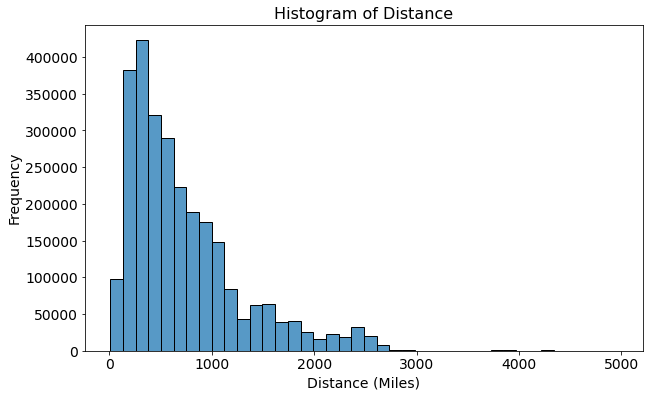

In [65]:
# Plotting a Histogram of Distance
plt.figure(figsize=[10,6])
sb.histplot(data=flights, x='Distance', bins=40)
# Titles and labeling
plot_labels('Distance (Miles)','Frequency','Histogram of Distance',16);

The distribution shows skewness but also show that the frequency counts are far apart. Getting a closer view will give better insights, can we?

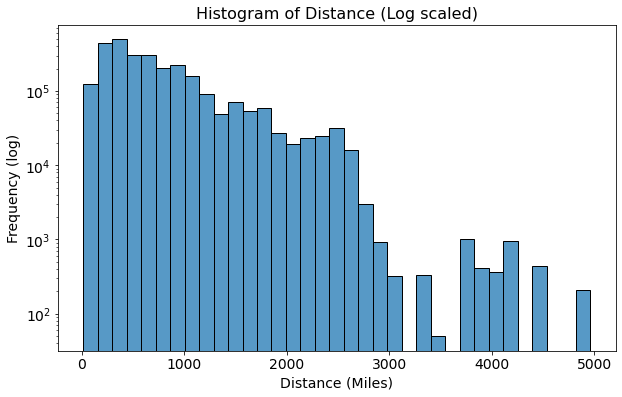

In [66]:
# Log scaled Histogram plot of Distance
plt.figure(figsize=[10,6])
sb.histplot(data=flights, x='Distance', bins=35)
plt.yscale('log')
# Labels and Title
plot_labels('Distance (Miles)','Frequency (log)','Histogram of Distance (Log scaled)',16);

From the first plot, the distribution appears to be right skewed.The positive distribution shows that there are more values towards the right.

Taking a closer look at the log scalled visual, it is clear that the values are close to each other and there is a gradual but steady decline as the distance increases. This means that flights are mostly less than 1000 Miles.

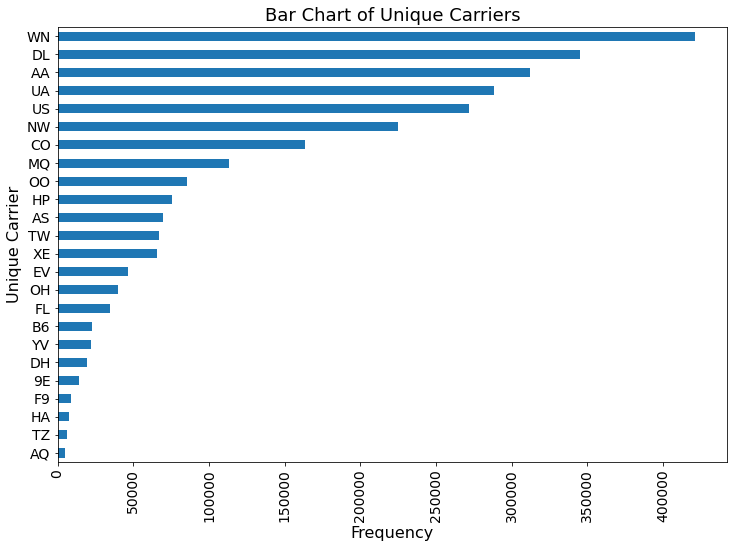

In [68]:
# Plotting bar chat of Unique Carriers
plt.figure(figsize=[12,8])
base_color = sb.color_palette()[0]
flights.UniqueCarrier.value_counts().sort_values(ascending=True).plot.barh(color=base_color)
# Labelling and Title
plot_labels('Frequency','Unique Carrier','Bar Chart of Unique Carriers',18)
plt.xticks(rotation=90);

The Unique Carriers plot reveals the least and most popular carriers to be AQ and UWN respectively. 
 
>* Least popular: 9 Air (AQ)
>* Most popular: Southwest Airlines (WN)


Is it possible to look deep down to each day of the dates? (Visualization of **time trend analysis** using the `Date` column). 
<br> To begin, we will iterate through the *Year, Month, Week and days* to find valuable insights to aid futrher exploration. 

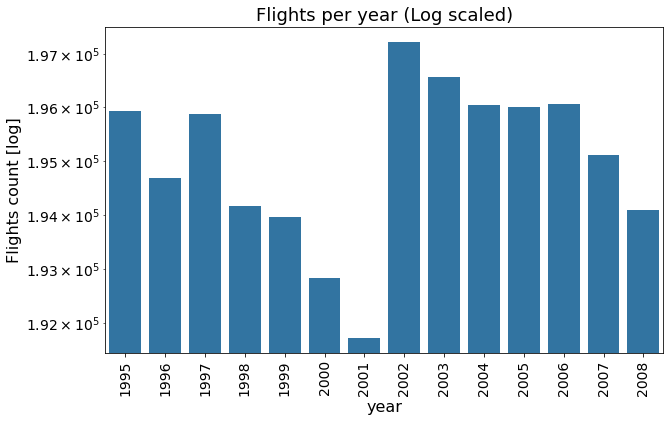

In [69]:
# Plotting Annual Flights using Date column
plt.figure(figsize=[10,6])
base_color = sb.color_palette()[0]
flights['Date'] = pd.to_datetime(flights['Date'])
sb.countplot(data=flights, x=flights['Date'].dt.to_period('Y'), color = base_color)
plt.yscale('log')
# Labels and titles
plot_labels('year','Flights count [log]','Flights per year (Log scaled)',18)
# rotate the category labels
plt.xticks(rotation=90);

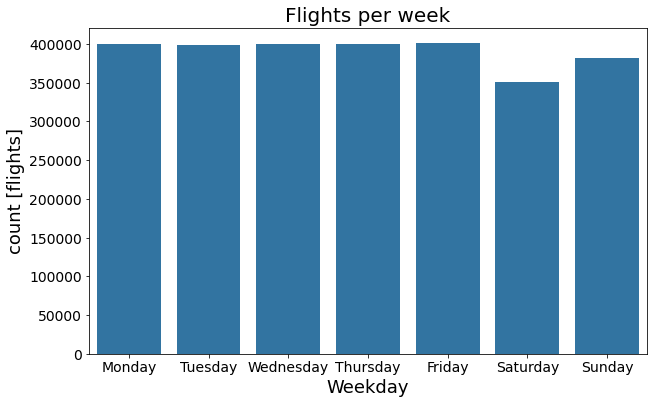

In [72]:
# Weekly flights
plt.figure(figsize=[10,6])
base_color = sb.color_palette()[0]
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.countplot(data=flights, x=flights.Date.dt.day_name(), order=weekday, color=base_color)
# Tilte and labels
plot_labels('Weekday','count [flights]','Flights per week',20);


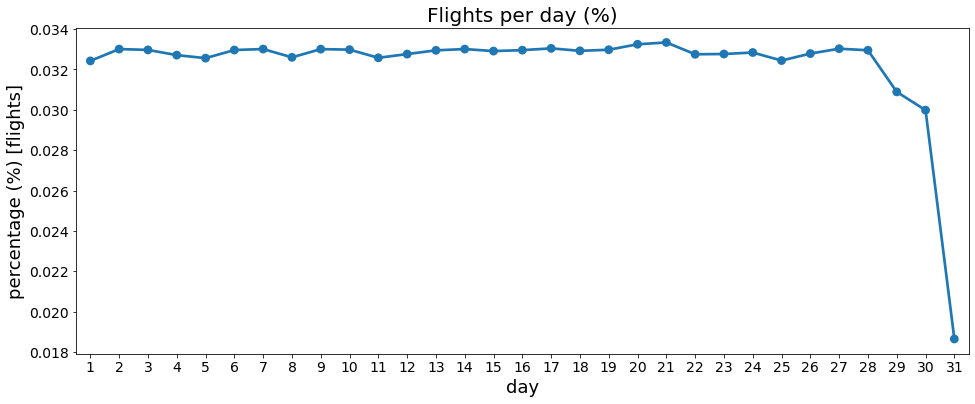

In [73]:
# Plotting Daily flights
flights_per_day = (flights.Date.dt.day.value_counts().sort_index())/flights.shape[0]
# Point plot for daily flghts
plt.figure(figsize=[16,6])
sb.pointplot(x=flights_per_day.index, y=flights_per_day.values, color = base_color);
# Labels and title
plot_labels('day','percentage (%) [flights]','Flights per day (%)',20);

>**Annual flights plot** reveals a gradual decrease in the number of flights from 1997 - 2001 afterwhich the counts spiked in 2002 and created a modal peak between 1995 - 2008. The year with the least amount of flights is 2001, this is the same year that the 9/11 attcaks happened. The y7ear with the most amount of flights is 2002.
<br>
**Weekly flights plot** show a steady amount of flights during weekdays (Monday-Friday) and a slight decrease in counts of flights on weekends. 
<br>
**Daily flights plot** reveal that flight demands decrease significantly on the last few days at the end of the month.


In [32]:
# Exploring most popular origins and destinations
popular_destinations = flights['Dest'].value_counts()[:20]
popular_origins = flights['Origin'].value_counts()[:20]

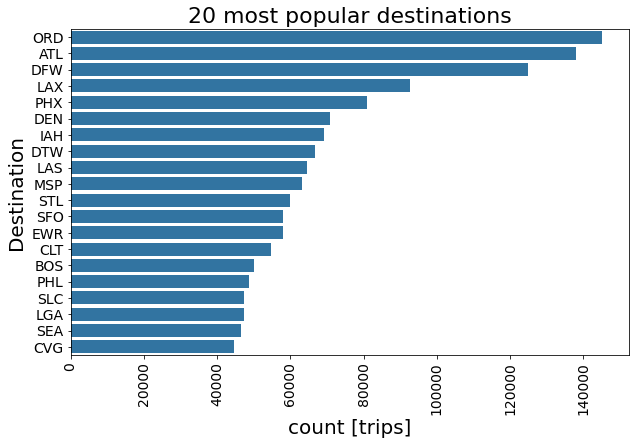

In [74]:
# 20 most popular destinations
plt.figure(figsize=[10,6])
base_color = sb.color_palette()[0]
sb.barplot(x=popular_destinations, y=popular_destinations.index, color=base_color)
# Title and labels
plot_labels('count [trips]','Destination','20 most popular destinations',22)
# Use xticks to rotate the labels
plt.xticks(rotation=90);

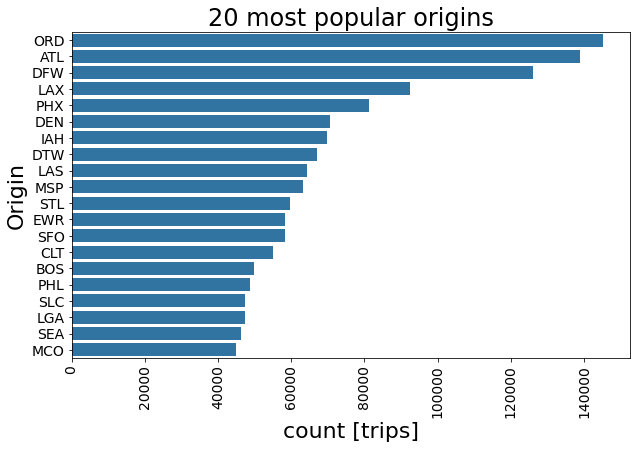

In [75]:
# 20 most popular origins
plt.figure(figsize=[10,6])
base_color = sb.color_palette()[0]
sb.barplot(x=popular_origins, y=popular_origins.index, color=base_color)
# Title and labels 
plot_labels('count [trips]','Origin','20 most popular origins',24);
# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90);

From the plots above, the most popular destinations and origins are;
> * Orchard Field Airport (ORD)
>* Atlanta Airport (ATL)
>* Dallas/Fort Worth airport (DFW)
<br>

A pattern exists where most of the popular destinations are the same as origins which suggests that most flights are return flights. 


Exploration of _dummy variables_ using pie plots.

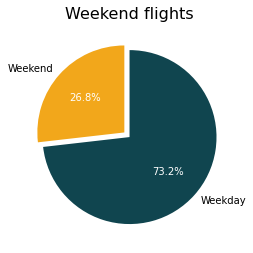

In [35]:
# Percentage of weekend and weekday flights
# plotting the pie chart
_, _, labels = plt.pie(flights['is_weekend'].value_counts(), labels = ['Weekday', 'Weekend'], 
        colors=['#10454F','#F2A71B'], startangle = 90, counterclock = False, 
        explode = (0, 0.08), radius = 1.0, autopct = '%1.1f%%')
# Change autopct text color to be white
for num in labels:
    num.set_color('white')
# Set plot title
plt.title('Weekend flights', fontsize=16, y=1.015)
plt.rcParams['font.size'] = 12
# showing the plot
plt.show()

The pie chart confirms previous insight of higher flight demands during weekdays which holds 73.2% of the total number of weekly flights. 

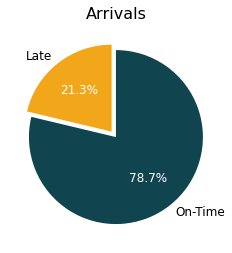

In [36]:
# Percentage of Late Arrivals (Dummy Variable)
# plotting the pie chart
_, _, labels = plt.pie(flights['Late_Arr'].value_counts(), labels = ['On-Time', 'Late'], 
        colors=['#10454F','#F2A71B'], startangle = 90, counterclock = False, 
        explode = (0, 0.08), radius = 1.0, autopct = '%1.1f%%')
# Change autopct text color to be white
for num in labels:
    num.set_color('white')
# Set plot title
plt.title('Arrivals', fontsize=16, y=1.015)
plt.rcParams['font.size'] = 14
# showing the plot
plt.show()

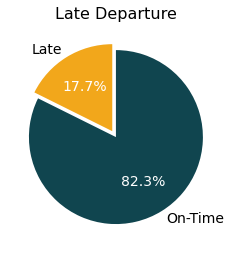

In [37]:
# Percentage of Late Depatures (Dummy variable)
# plotting the pie chart
_, _, labels = plt.pie(flights['Late_Dep'].value_counts(), labels = ['On-Time', 'Late'], 
        colors=['#10454F','#F2A71B'], startangle = 90, counterclock = False, 
        explode = (0, 0.08), radius = 1.0, autopct = '%1.1f%%')
# Change autopct text color to be white
for num in labels:
    num.set_color('white')
# Set plot title
plt.title('Late Departure', fontsize=16, y=1.015)
plt.rcParams['font.size'] = 14
# showing the plot
plt.show()

* When a carrier arrives or departs 15 minutes more than the scehduled time, it is considered **late**. The data records 21.3% of late arrivals and 17.7% of late departures of flights between 1995 - 2008. 
* The charts show a higher percentage of late arrivals which suggests that the elapsed time error is most likely due to arrival delays.


To extract more data about distance, feature engineering will be used to create a variable that shows the length of flights(short, medium or long).

In [38]:
# Using cut, create bins for lengths
# Short hauls = less than 700 miles, Long Hauls = greater than 3000 miles
flights['flight_length'] = pd.cut(x=flights['Distance'], bins=[0,699,3000,50000], labels= ['Short haul','Medium haul','Long haul'])

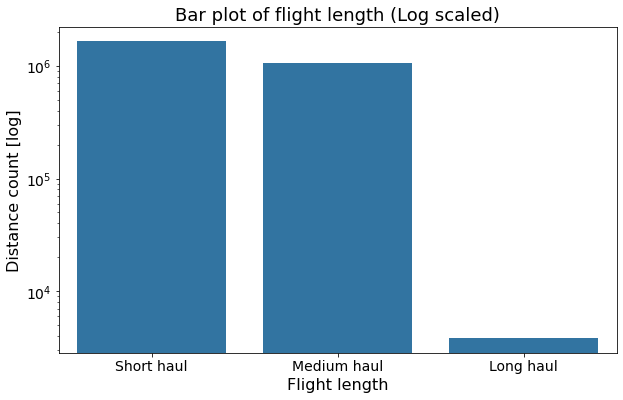

In [76]:
# Plotting Flight lengths 
plt.figure(figsize=[10,6])
base_color = sb.color_palette()[0]

sb.countplot(data=flights, x=flights['flight_length'], color = base_color)
plt.yscale('log')
# Labels and titles
plot_labels('Flight length','Distance count [log]','Bar plot of flight length (Log scaled)',18);

> The greatest amount of flights are short haul flights (1,653,329 counts) followed by medium haul flights ( 1,073,085 counts) and then Long haul flights (3,836 counts). The carriers mostly go on short and medium haul flights.

## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
> * A log transformation was performed on the `distance` and *Flights per year* plots. This enabled the close-up visualization of the frequency of values. 
> * The visualizations revealed very low amount of long haul flights which make a very small percentage of the total amount of flights.

## Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
> During the wrangling phase, i created 3 dummy variables (`Late_Arr` ,`Late_Dep`,`is_weekend`). These variables, when visualized can create solutions to some raised questions. The Month, Day and Year columns were also merged to create `Date` column which was then converted to datetime. While exploringt, i feature engineered the `Distance` column to create the different flight lengths.

# Bivariate Exploration

To begin, checking the correlation between numeric values using a heatmap will yield good insights on where to begin.

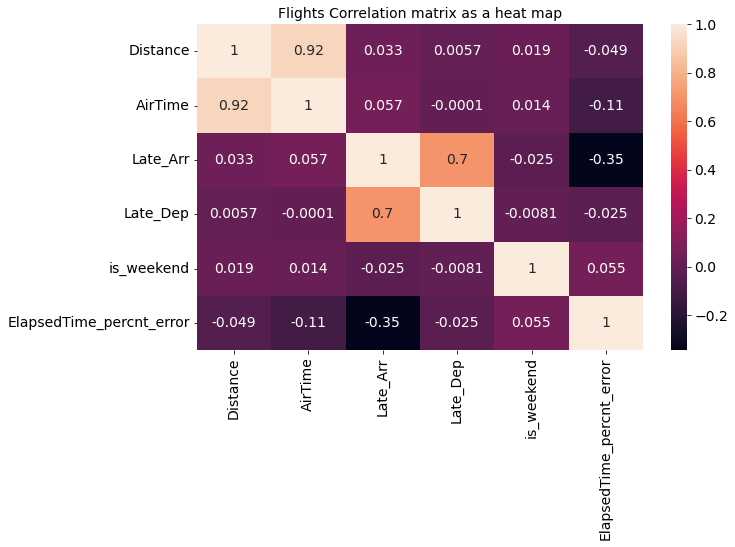

In [40]:
# Linear correlation check
plt.figure(figsize=[10,6])
corr_df = flights.corr()
sb.heatmap(corr_df, annot=True)
plt.title('Flights Correlation matrix as a heat map', fontsize=14)
plt.show()

`Distance` and `Airtime` showed high correlation. What kind of relationshp exists between these columns? Is it weak or strong?

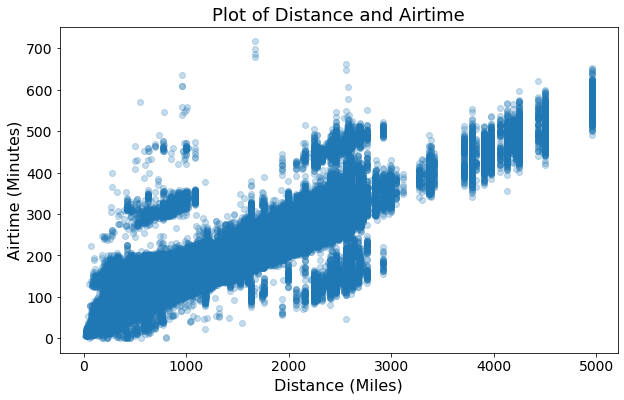

In [77]:
# Scatterplot of Distance and Airtime
pos_flights = flights[(flights['AirTime'] > 0) & (flights['AirTime'] < 1000)]
plt.figure(figsize=[10,6])
plt.scatter(data=pos_flights, x='Distance', y='AirTime', alpha =1/4)
# Title and Labels
plot_labels('Distance (Miles)','Airtime (Minutes)','Plot of Distance and Airtime',18);


The scatter plot shows **strong positve correlation** between `Distance` and `Airtime`. The plot also reveals most of the distance to be within 0 - 3000 Miles but will require more analysis to confirm.

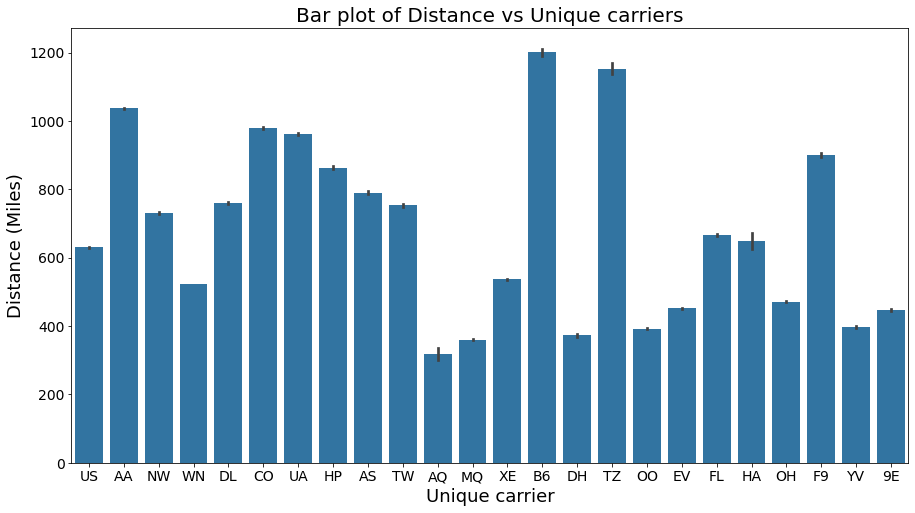

In [78]:
# Plot Distance vs Unique Carriers
plt.figure(figsize=(15,8))
sb.barplot(x=flights['UniqueCarrier'], y=flights.Distance, color=base_color)
# Title and labels
plot_labels('Unique carrier','Distance (Miles)','Bar plot of Distance vs Unique carriers',20);

We need a closer view on the `Distance` covered for each Carrier, we will explore this closely using a facet grid. Can we get a closer view?

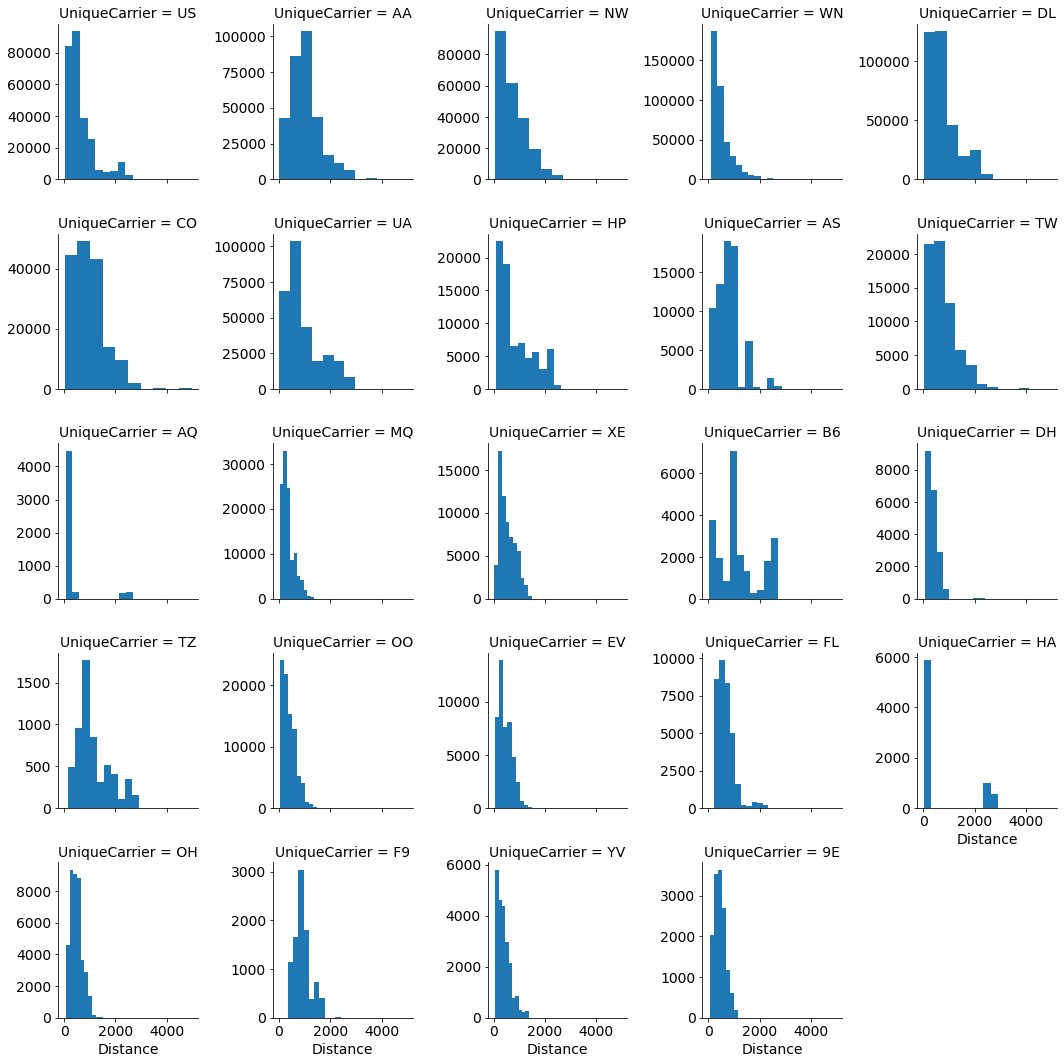

In [43]:
# Plot Distance of each Unique Carrier
g = sb.FacetGrid(data = flights, col = 'UniqueCarrier', col_wrap =5, sharey=False)
g.map(plt.hist, "Distance");

* From the facet grid histogram of carriers show that most flights are within 0-1500 Miles as opposed to earlier findings from scatterplot. 
* Air Tanzania (TZ) and JetBlue (B6) have higher mean distances due to their coverage of > 1500 miles.   

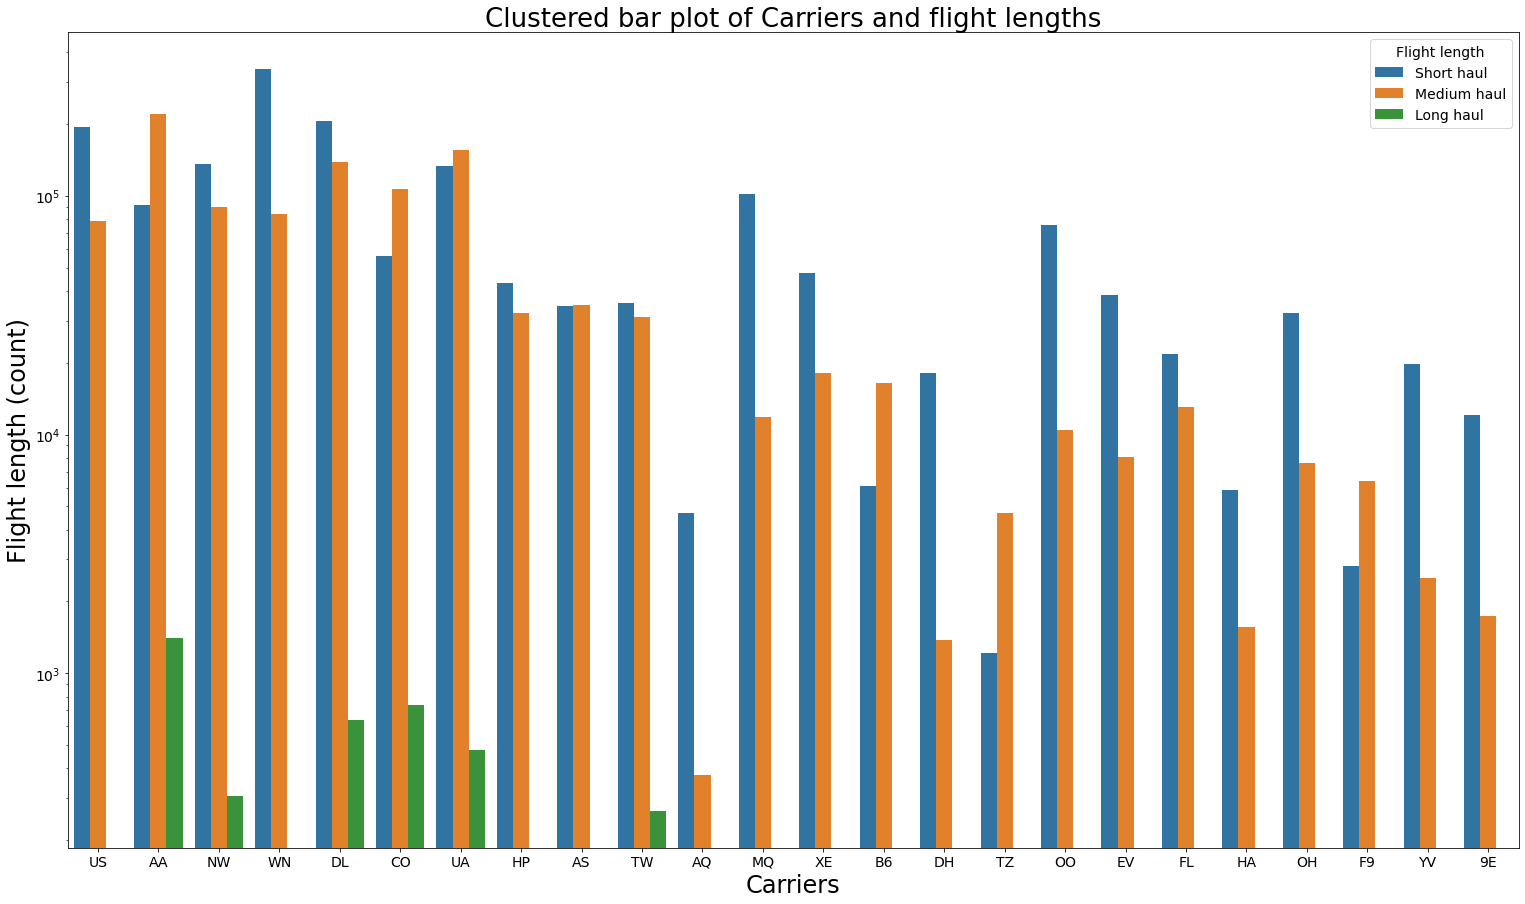

In [79]:
# Plotting bar plot of Carriers and flight lengths
plt.figure(figsize=(26,15))
sb.countplot(data = flights, x = 'UniqueCarrier', hue = 'flight_length')
plt.yscale('log')
plt.legend(title='Flight length')
# Title and labels
plot_labels('Carriers','Flight length (count)','Clustered bar plot of Carriers and flight lengths',26);

The distribution of flight length counts by carriers confirms that most carriers take short and medium haul flights and only 6 carriers (AA, NW, DL, CO, UA, TW) have significant amounts of long haul flights. The **most popular carriers** according to flight lengths are:
* Short haul flights - Southwest airlines (WN)
* Medium haul flights - American airlines (AA)
* Long haul flights - American airlines (AA)

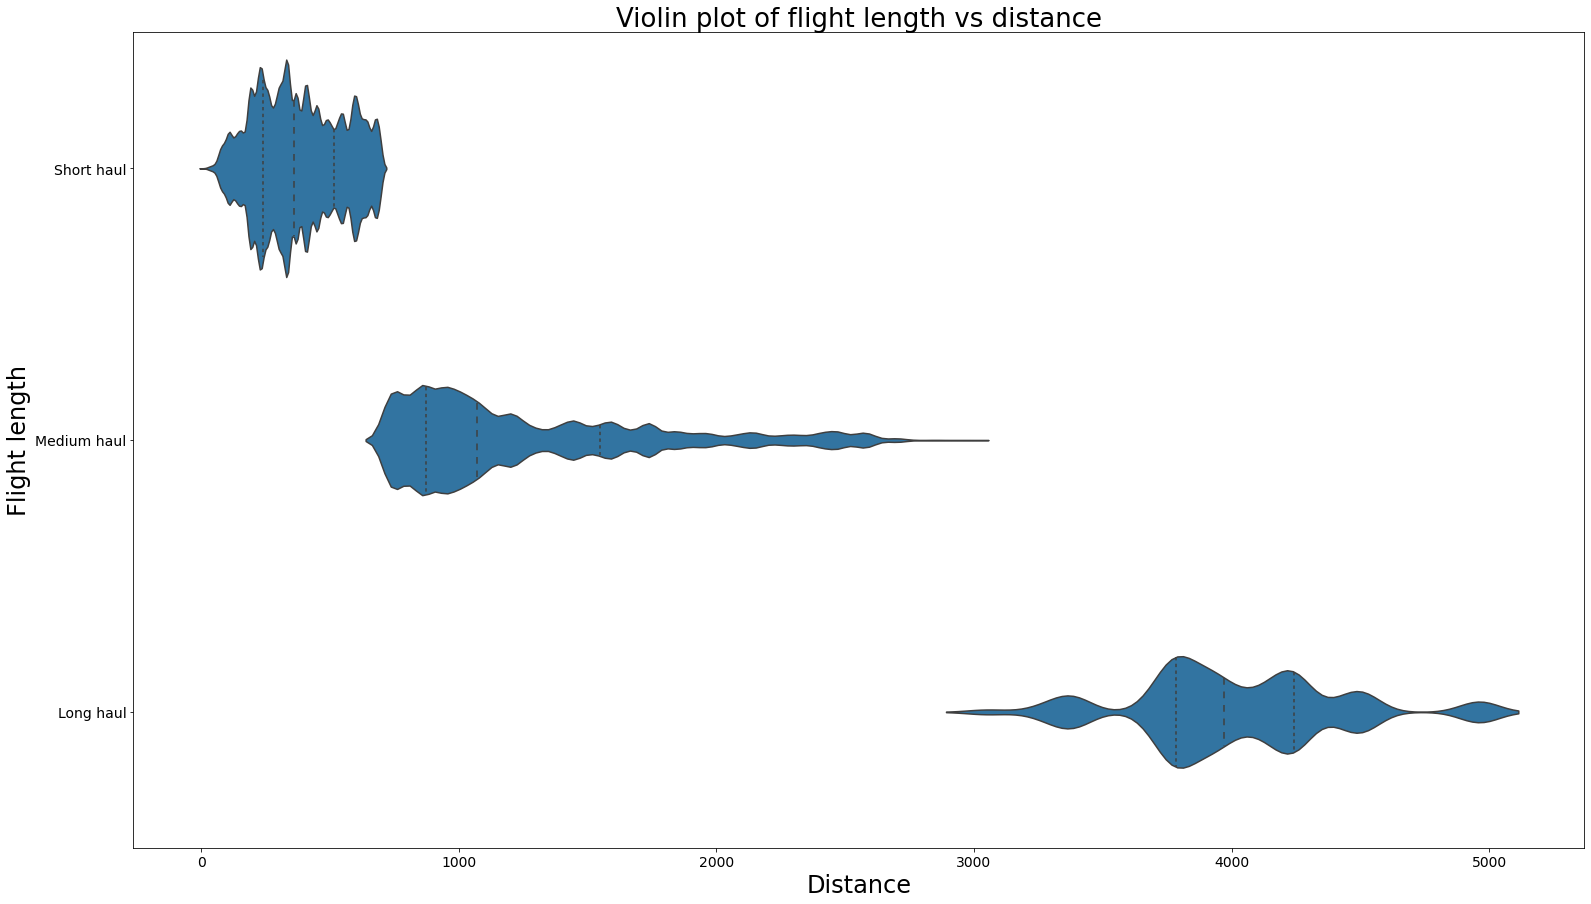

In [80]:
# ViolinPlot of Distance vs flight length
plt.figure(figsize=(26,15))
sb.violinplot(x=flights['Distance'], y=flights.flight_length, color=base_color, inner='quartile')
# Title and labels
plot_labels('Distance','Flight length','Violin plot of flight length vs distance',26);

The violin plot of flight lengths show a greater spread for short haul flights than others. Most medium haul flights are between 800 miles to 1200 miles and 3700 miles to 4200 miles for long haul flights.

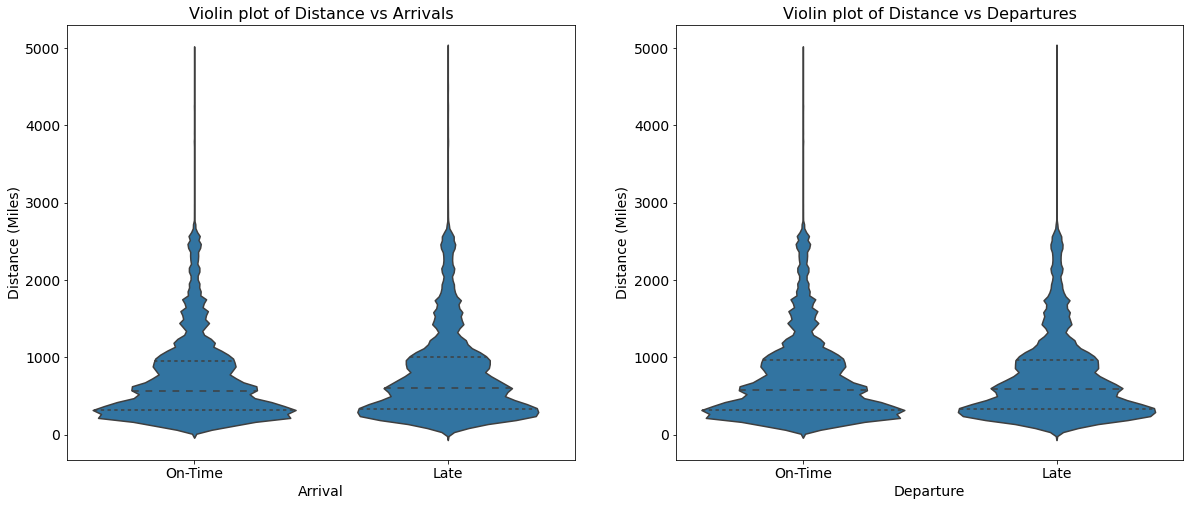

In [81]:

fig, ax = plt.subplots(ncols=2, figsize=(20,8))
# Violin plot of 'Distance' vs 'Late_Arr'
plt.subplot(1,2,1)
sb.violinplot(data=pos_flights, x='Late_Arr', y='Distance', color = base_color, inner='quartile')
ticks = [0,1]
labels = ['On-Time', 'Late']
plt.xticks(ticks, labels)
# Title and labels
plot_labels('Arrival','Distance (Miles)','Violin plot of Distance vs Arrivals',16);

# Violin plot of 'Distance' vs 'Late_Dep'
plt.subplot(1,2,2)
sb.violinplot(data=pos_flights, x='Late_Dep', y='Distance', color = base_color, inner='quartile')
ticks = [0, 1]
labels = ['On-Time', 'Late']
plt.xticks(ticks, labels)
# Title and Labels
plot_labels('Departure','Distance (Miles)','Violin plot of Distance vs Departures',16);

TThe violin plot reveals that most of the departures and arrivals are short haul flights which is normal as we have confirmed that there are more short hauls than medium and long combined.  

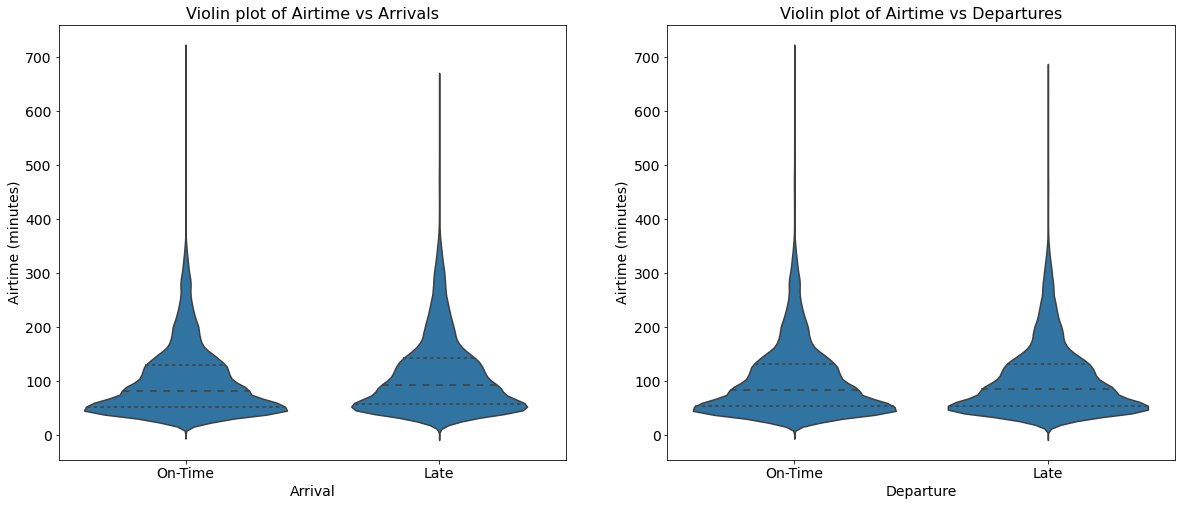

In [82]:

fig, ax = plt.subplots(ncols=2, figsize=(20,8))
# Violin plot of 'Airtime' vs 'Late_Arr'
plt.subplot(1,2,1)
sb.violinplot(data=pos_flights, x='Late_Arr', y='AirTime', color = base_color, inner='quartile')
ticks = [0,1]
labels = ['On-Time', 'Late']

plt.xticks(ticks, labels)
# Title and labels
plot_labels('Arrival','Airtime (minutes)','Violin plot of Airtime vs Arrivals',16);

# Violin plot of 'Airtime' vs 'Late_Dep'
plt.subplot(1,2,2)
sb.violinplot(data=pos_flights, x='Late_Dep', y='AirTime', color = base_color, inner='quartile')
ticks = [0, 1]
labels = ['On-Time', 'Late']
plt.xticks(ticks, labels)
# Title and Labels
plot_labels('Departure','Airtime (minutes)','Violin plot of Airtime vs Departures',16);


The violin plot of arrivals/departures against airtime reveals spreads between 0 - 360 minutes (short and medium hauls) for both departures and arrivals. The similarity in spreads suggests that arrivals and departures whether late or ontime take have similar airtime. These variables should be explored more.

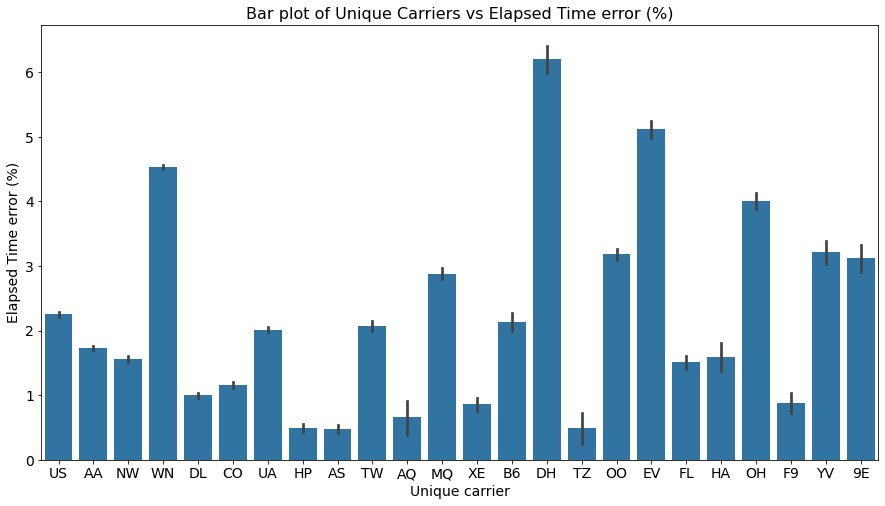

In [83]:
# Plot Unique Carriers vs Elapsed Time error(%)
plt.figure(figsize=(15,8))
sb.barplot(x=flights['UniqueCarrier'], y=flights.ElapsedTime_percnt_error, color=base_color)
# Title and labels
plot_labels('Unique carrier','Elapsed Time error (%)','Bar plot of Unique Carriers vs Elapsed Time error (%)',16);

The Carrier with the highest elapsed time error is Atlantic Coast Airlines (DH). The percentage is approximately 6% and is negligible for this analysis.


I will now begin a **time trend analysis** of Late and On-time flights. This analysis will involve a subplot for arrivals and depatures to aid in comparison. This will give us good insights into how correlated these variables are. 

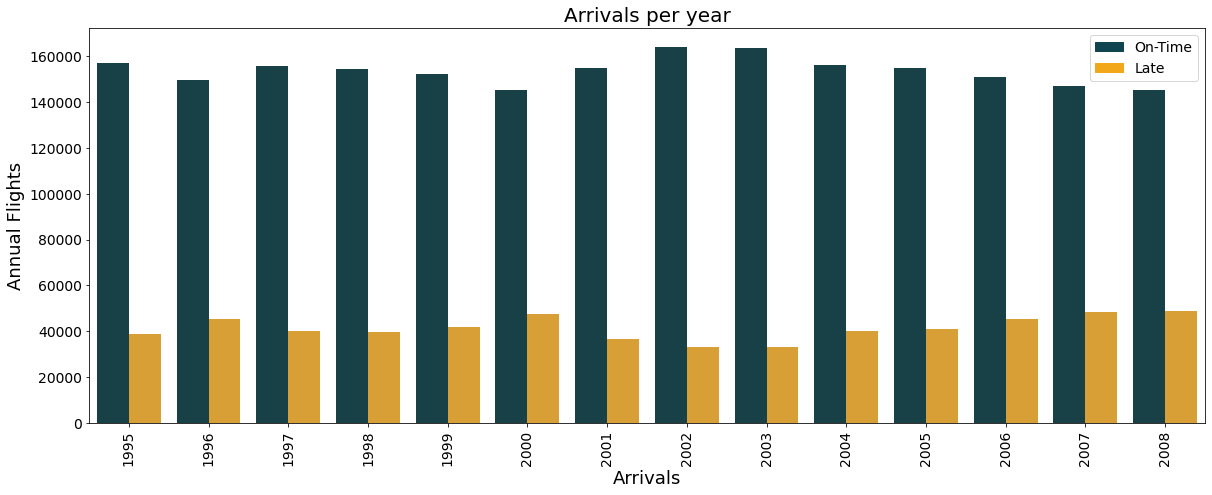

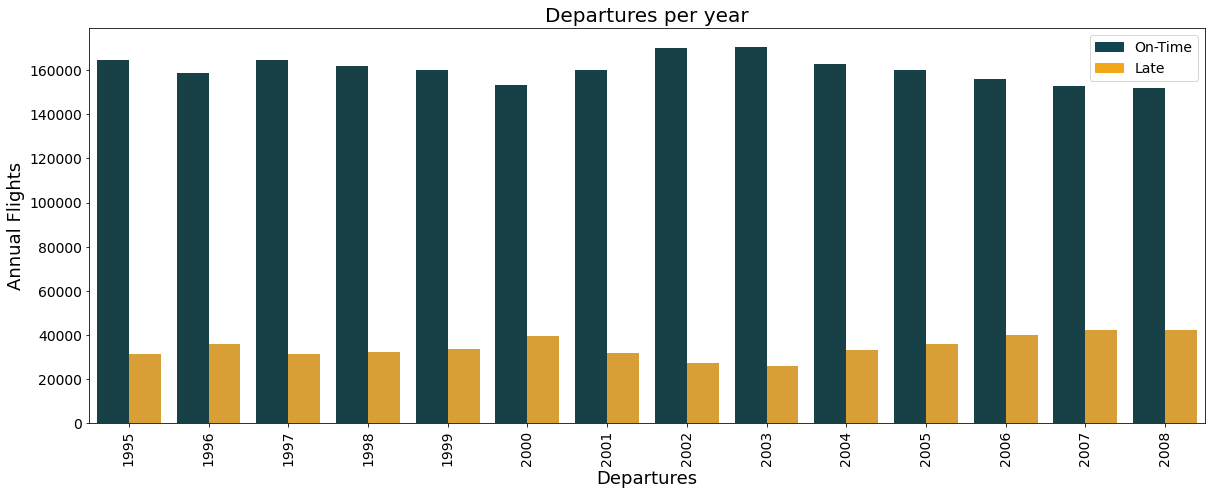

In [85]:
# Subplot of annual late and on-time distributions 

fig, axs = plt.subplots(1, 1, figsize=(20, 16))
# Plot of Late arrivals per year
plt.subplot(2, 1, 1)
sb.countplot(data=flights, x=flights['Date'].dt.to_period('Y'), hue='Late_Arr', palette=['#10454F','#F2A71B'])
# Titles and Labels
plot_labels('Arrivals','Annual Flights','Arrivals per year',20);
# Set label rotation to 90
plt.xticks(rotation=90)
# Legend automation
ontime_legend = mpatches.Patch(color='#10454F', label='On-Time')
late_legend = mpatches.Patch(color='#F2A71B', label='Late')
plt.legend(handles=[ontime_legend, late_legend])
plt.show();

fig, axs = plt.subplots(1, 1, figsize=(20, 16))
# Plot of Late arrivals per year
plt.subplot(2, 1, 2)
sb.countplot(data=flights, x=flights['Date'].dt.to_period('Y'), hue='Late_Dep', palette=['#10454F','#F2A71B'])
# Titles and Labels
plot_labels('Departures','Annual Flights','Departures per year',20);
# Set label rotation to 90
plt.xticks(rotation=90)
# Legend automation
ontime_legend = mpatches.Patch(color='#10454F', label='On-Time')
late_legend = mpatches.Patch(color='#F2A71B', label='Late')
plt.legend(handles=[ontime_legend, late_legend])
plt.show();

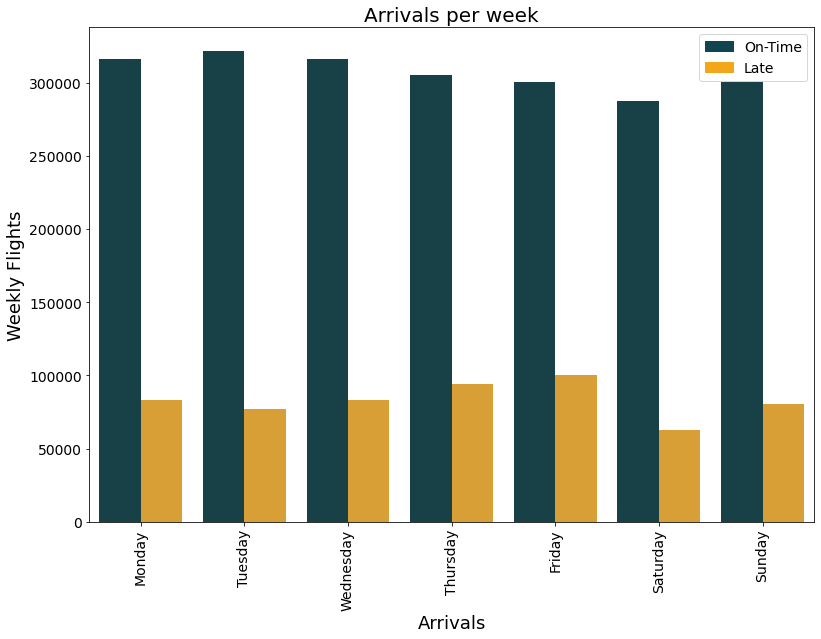

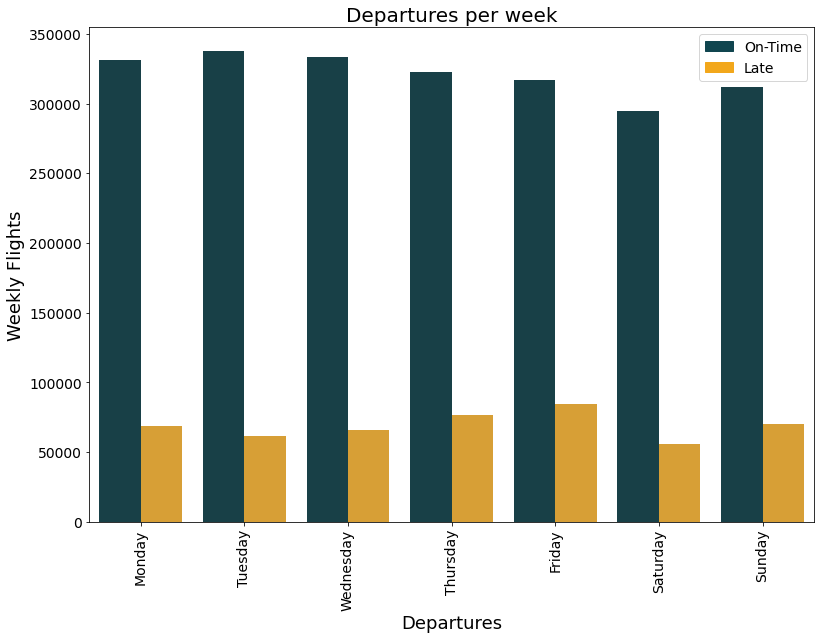

In [86]:
# Subplot of Weekly late and ontime distributions

fig, axs = plt.subplots(1, 1, figsize=(13, 20))

# Plot of Late arrivals per week
plt.subplot(2,1,1)
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.countplot(data=flights, x=flights.Date.dt.day_name(), hue='Late_Arr', order=weekday,  palette=['#10454F','#F2A71B'])
# Titles and Labels
plot_labels('Arrivals','Weekly Flights','Arrivals per week',20);
# Set label rotation to 90
plt.xticks(rotation=90)
# Legend automation
ontime_legend = mpatches.Patch(color='#10454F', label='On-Time')
late_legend = mpatches.Patch(color='#F2A71B', label='Late')
plt.legend(handles=[ontime_legend, late_legend])
plt.show();

fig, axs = plt.subplots(1, 1, figsize=(13, 20))
# Plot of Late arrivals per week
plt.subplot(2,1,2)
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.countplot(data=flights, x=flights.Date.dt.day_name(), hue='Late_Dep', order=weekday,  palette=['#10454F','#F2A71B'])
# Titles and Labels
plot_labels('Departures','Weekly Flights','Departures per week',20);
# Set label rotation to 90
plt.xticks(rotation=90)
# Legend automation
ontime_legend = mpatches.Patch(color='#10454F', label='On-Time')
late_legend = mpatches.Patch(color='#F2A71B', label='Late')
plt.legend(handles=[ontime_legend, late_legend])
plt.show();

To plot the number of late arrivals/departures per day, each instance of the dummy variable should be plotted separately.

In [51]:
# Mask each instance of dummy variable (Late Arrival)
ontime_arr = flights['Late_Arr'] == 0
late_arr = flights['Late_Arr'] == 1

In [52]:
# Mask each instance of dummy variable (Late departure)
ontime_dep = flights['Late_Dep'] == 0
late_dep = flights['Late_Dep'] == 1

In [53]:
# Days with most late departure flights 
ontime_flights_dep = (flights.Date[ontime_dep].dt.day.value_counts().sort_index())/flights[ontime_dep].shape[0]
late_flights_dep = (flights.Date[late_dep].dt.day.value_counts().sort_index())/flights[late_dep].shape[0]

In [54]:
# Days with most late arrival flights
ontime_flights_arr = (flights.Date[ontime_arr].dt.day.value_counts().sort_index())/flights[ontime_arr].shape[0]
late_flights_arr = (flights.Date[late_arr].dt.day.value_counts().sort_index())/flights[late_arr].shape[0]

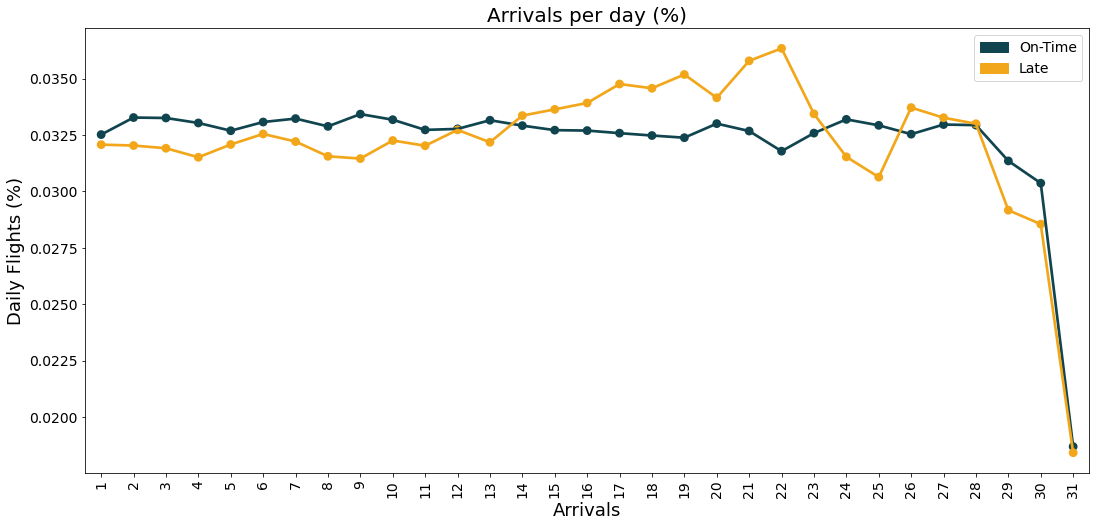

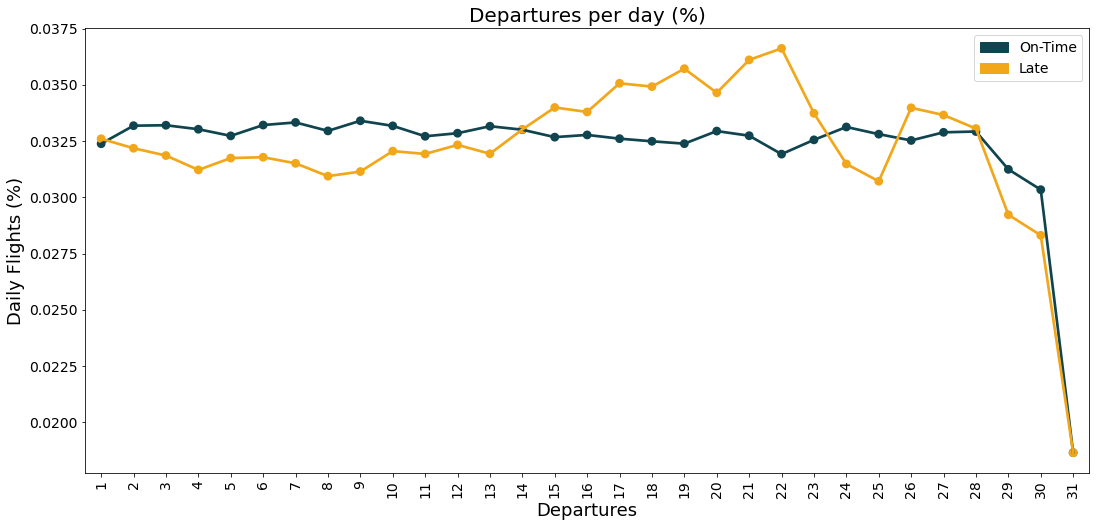

In [87]:
# Subplot of daily late arrivals/departures
fig, axs = plt.subplots(1, 1, figsize=(18, 18))
# Plot of Late arrivals per week
plt.subplot(2,1,1)
sb.pointplot(x=ontime_flights_arr.index, y=ontime_flights_arr.values, color='#10454F')
sb.pointplot(x=late_flights_arr.index, y=late_flights_arr.values, color='#F2A71B')
# Titles and Labels
plot_labels('Arrivals','Daily Flights (%)','Arrivals per day (%)',20);
# Set label rotation to 90
plt.xticks(rotation=90)
# Legend automation
ontime_legend = mpatches.Patch(color='#10454F', label='On-Time')
late_legend = mpatches.Patch(color='#F2A71B', label='Late')
plt.legend(handles=[ontime_legend, late_legend])
plt.show();


fig, axs = plt.subplots(1, 1, figsize=(18, 18))
# Plot of Late departures per week
plt.subplot(2,1,2)
sb.pointplot(x=ontime_flights_dep.index, y=ontime_flights_dep.values, color='#10454F')
sb.pointplot(x=late_flights_dep.index, y=late_flights_dep.values, color='#F2A71B')
# Titles and Labels
plot_labels('Departures','Daily Flights (%)','Departures per day (%)',20);
# Set label rotation to 90
plt.xticks(rotation=90)
# Legend automation
ontime_legend = mpatches.Patch(color='#10454F', label='On-Time')
late_legend = mpatches.Patch(color='#F2A71B', label='Late')
plt.legend(handles=[ontime_legend, late_legend])
plt.show();

Insights from bivariate time-trend analysis plots:
* Year(s) with highest amount of arrivals/departures;
    *  `On-Time` - 2002 and 2003
    * `Late` - 2000, 2007 and 2008
* Weekday(s) with highest amount of arrivals/departures;
    *  `On-Time` - Mondays, Tuesdays and Wednesdays
    * `Late` - Thursdays and Fridays
* Day(s) with highest percentage of arrivals/departures;
    *  `Late` - 14th - 23rd, 26th, 27th and 28th
* The daily trend analysis shows a decrease in percentage of arrivals/departures from 29th - 31st.

To best interpret the bivariate time trend analysis, we 
will need to know the percentage of on-time and late arrivals/departures for each carrier.

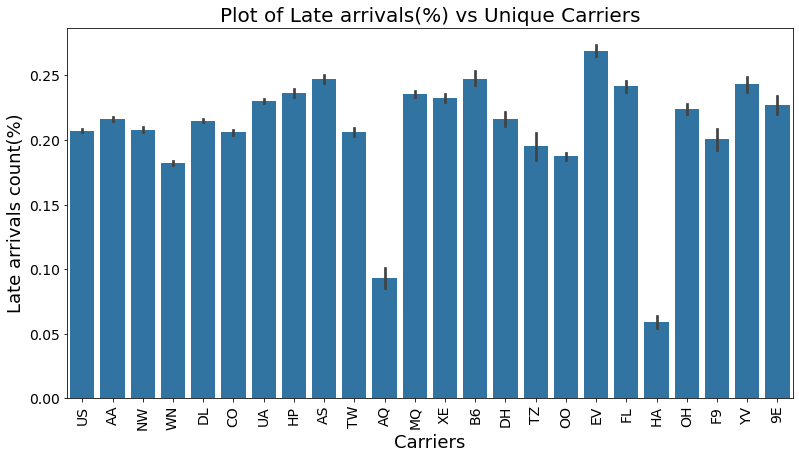

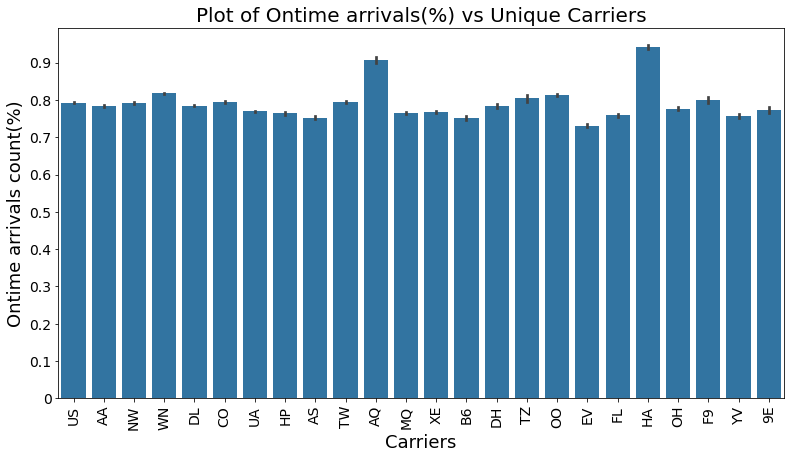

In [88]:
fig, axs = plt.subplots(1, 1, figsize=(13, 15))

# Plot of percentage on-time arrivals vs unique carriers
plt.subplot(2,1,1)
sb.barplot(x=flights.UniqueCarrier, y=late_arr, color=base_color)
# Titles and Labels
plot_labels('Carriers','Late arrivals count(%)','Plot of Late arrivals(%) vs Unique Carriers',20);
# Set label rotation to 90
plt.xticks(rotation=90);

fig, axs = plt.subplots(1, 1, figsize=(13, 15))
# Plot of percentage on-time arrivals vs unique carriers
plt.subplot(2,1,2)
sb.barplot(x=flights.UniqueCarrier, y=ontime_arr, color=base_color)
ticks = [0, 0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]
labels = ['{}'.format(v) for v in ticks]
# Titles and Labels
plot_labels('Carriers','Ontime arrivals count(%)','Plot of Ontime arrivals(%) vs Unique Carriers',20);
plt.yticks(ticks,labels)
# Set label rotation to 90
plt.xticks(rotation=90);

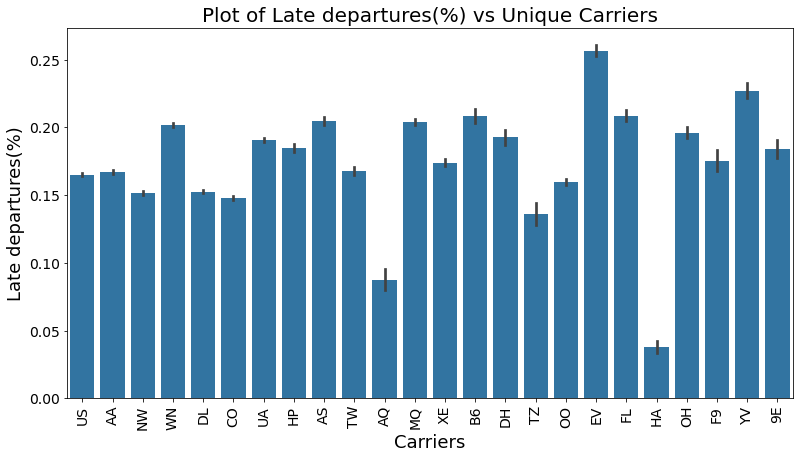

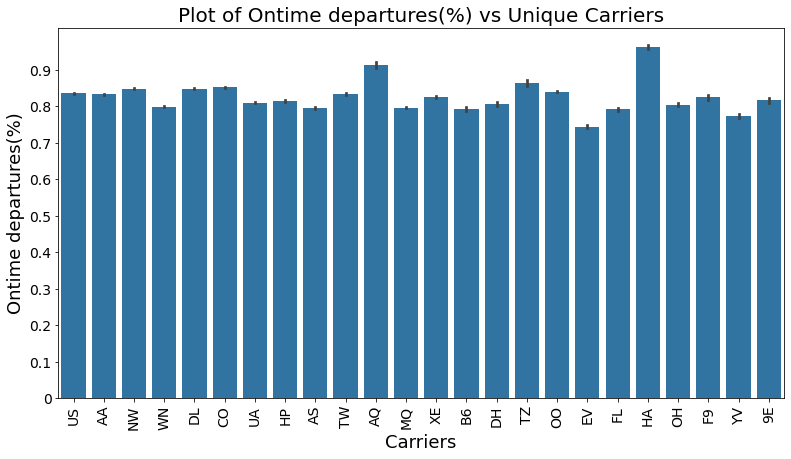

In [89]:
fig, axs = plt.subplots(1, 1, figsize=(13, 15))

# Plot of percentage on-time arrivals vs unique carriers
plt.subplot(2,1,1)
sb.barplot(x=flights.UniqueCarrier, y=late_dep, color=base_color)
# Titles and Labels
plot_labels('Carriers','Late departures(%)','Plot of Late departures(%) vs Unique Carriers',20);
# Set label rotation to 90
plt.xticks(rotation=90);

fig, axs = plt.subplots(1, 1, figsize=(13, 15))
# Plot of percentage on-time arrivals vs unique carriers
plt.subplot(2,1,2)
sb.barplot(x=flights.UniqueCarrier, y=ontime_dep, color=base_color)
ticks = [0, 0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]
labels = ['{}'.format(v) for v in ticks]
# Titles and Labels
plot_labels('Carriers','Ontime departures(%)','Plot of Ontime departures(%) vs Unique Carriers',20);
plt.yticks(ticks,labels)
# Set label rotation to 90
plt.xticks(rotation=90);

Both arrivals and departures show almost similar percentage trends for Carriers. 
* Arrivals 
    * At least 19 of 24 carriers have over 70% record of `ontime arrivals` but only about 5 cross 80%.
    * `Late arrivals` have percentages between 4% - 28% for all carriers.
* Departures
     * Unlike arrivals,1/2 of all carriers show 80% record of `ontime departures`. (There is a 10% different between ontime departures and arrivals)
     * `Late departures` have percentages between 4% - 26% for all carriers. (Same as arrivals)
     
> These findings confirms the univariate exploratiion which revealed 17.3% late departures and 21.3% late arrivals for the whole dataset.

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
* Exploring `Distance` with `Airtime` showed a postive correlation. Both numeric values were used againt the dummy variables to aid exploration and yielded interesting results. The dummy variables showed little or no corelation with other numeric variables except for `Late arrivals` and `Late departures` which showed high correlation with each other. 
* The arrivals and departures were explored side by side and they showed very close distributions and trends.  

## Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
> `Airtime` was plotted against arrivals and departures where they showed an unexpected distribution. The distributions showed similar plots for ontime and late departures/arrival (one would expect that late arrivals would show some distinction from ontime arrivals when it involves airtime).

# Multivariate exploration

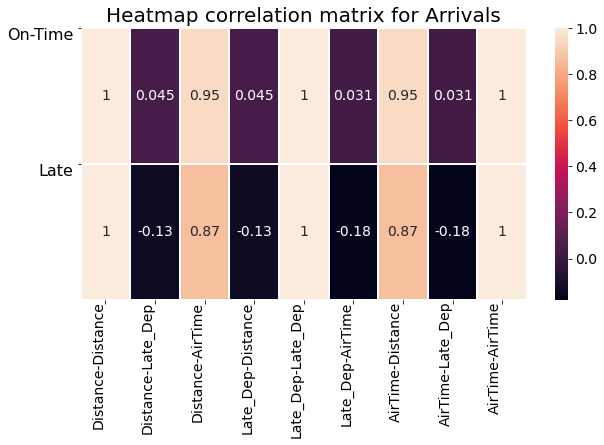

In [90]:
plt.figure(figsize=(10,5))
num_cols = ['Distance', 'Late_Dep', 'AirTime']
corr_df = flights[num_cols].groupby(flights['Late_Arr']).corr()
sb.heatmap(corr_df.unstack(), annot=True, linewidths=1.5)
ticks = [0, 1]
labels = ['On-Time', 'Late']
plt.xticks(va='center_baseline', ha='right', rotation=90, fontsize=14)
plt.yticks(ticks, labels, va='top', ha='right', rotation=0, fontsize=16)
plot_labels('','','Heatmap correlation matrix for Arrivals',20);
plt.show()

The correlation matrix shows difference in correlation for late and ontime arrivals against distance and airtime. There is higher correlation between `Distance` and `Airtime` for ontime arrivals. 

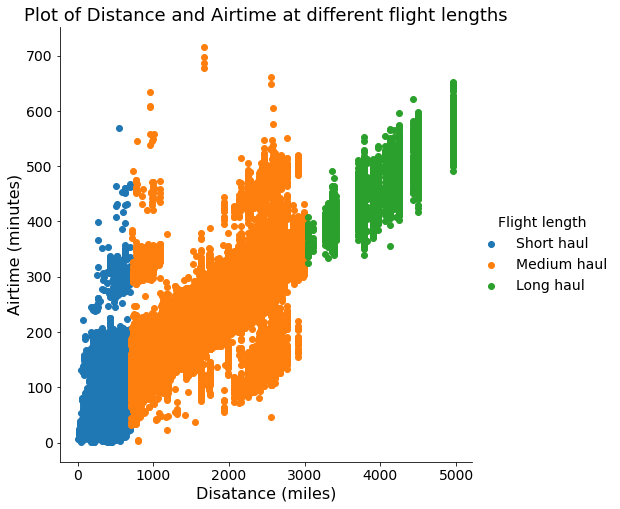

In [92]:
# Plot distance vs airtime for flight lengths
pos_flights = flights[(flights['AirTime'] > 0) & (flights['AirTime'] < 1000)] # Apply mask to filter outliers
g = sb.FacetGrid(data=pos_flights, hue = 'flight_length', height =7)
g.map(plt.scatter, 'Distance', 'AirTime') 
g.add_legend(title='Flight length')
plot_labels('Disatance (miles)','Airtime (minutes)','Plot of Distance and Airtime at different flight lengths',18);

The scatterplot confirms the positive relationship between airtime and distance. As the distance increases, the airtime increases consistently. The plot also reveals a few outliers which suggest lateness or delays.

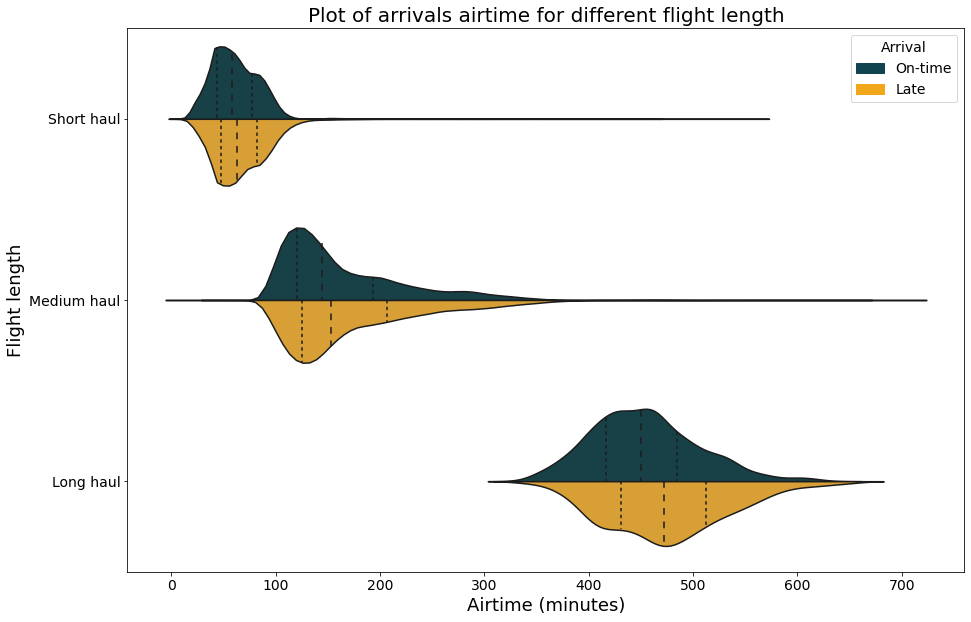

In [93]:
# Violin plopt for `flight_length` vs `Airtime` for lateness or ontime
pos_flights = flights[(flights['AirTime'] > 0) & (flights['AirTime'] < 1000)] # Apply mask to filter outliers
plt.figure(figsize=(15,10))
sb.violinplot(data=pos_flights, x='AirTime', y='flight_length', hue='Late_Arr',inner = 'quartile', palette=['#10454F','#F2A71B'], split=True)
plot_labels('Airtime (minutes)','Flight length','Plot of arrivals airtime for different flight length',20);
# Legend automation
ontime_legend = mpatches.Patch(color='#10454F', label= 'On-time')
late_legend = mpatches.Patch(color='#F2A71B', label= 'Late')
plt.legend(title='Arrival',handles=[ontime_legend, late_legend])
plt.show()

The violin plot of ontime and late flight lengths against airtime shows a slight but significant difference in ontime and late arrivals. Late arrivals have slightly higher airtime values than ontime arrivals. This could be due to many factors like weather or other technical issues. Therefore, `airtime` is a factor to be considered during arrival delays. 

In [61]:
# Update saved rangled dataframe
flights.to_csv('flights_data_wrangled', index=False)

## Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
* Plotting the occurences of arrivals on the correlation matrix showed a significant difference in the relationship between ontime and late arrivals.
* Plotting`flight length` against `airtime` and arrivals gave more insight to the findings from the bivariate plots. The categorical values were a base to check for differences between ontime and late arrivals when comparimg airtime. 

## Were there any interesting or surprising interactions between features?
* All findings in the multivariate exploration solidified earlier findings and gave good base for conclusion.

# Conclusions

*The data exposition on airline information from 1995 to 2008 was gathered for analysis programatically. A few transformations and exclusions were performed during the wrangling procedure in a bid to obtain clean and tidy data. Utilizing visualizations, the clean data was then investigated in order to draw conclusions and generate insightful findings.*

#### Carrier Information


- Popular carriers according to frequency: 
    * Least popular: 9 Air (AQ)
    * Most popular: Southwest Airlines (WN)
    
- The **most popular carriers** according to flight lengths are:
    * Short haul flights - Southwest airlines (WN)
    * Medium haul flights - American airlines (AA)
    * Long haul flights - American airlines (AA)

- 3 most popular destinations and origins are;
    * Orchard Field Airport (ORD)
    * Atlanta Airport (ATL)
    * Dallas/Fort Worth airport (DFW)
    
> A pattern exists where most of the popular destinations are the same as origins which suggests that most flights are return flights. 


#### Flight information
**Annual flights** counts spiked in 2002 and created a modal peak between 1995 - 2008. The year with the least number of flights is 2001. This is the same year that the 9/11 attacks happened. **Weekly flights** show a steady number of flights during weekdays (Monday-Friday) and a slight decrease in the number of flights on weekends.
**Daily flights** reveal that flight demand decreases significantly in the last few days of the month.

- The greatest amount of flights are short haul flights (1,653,329 counts) followed by medium haul flights ( 1,073,085 counts) and then Long haul flights (3,836 counts). The carriers mostly go on short and medium haul flights.

- Most medium haul flights are between 800 miles to 1200 miles and 3700 miles to 4200 miles for long haul flights.

#### Percentages
* Arrivals
    * Late - 21.3%
    * Ontime - 78.7%

* Departures
    * Late - 17.7%
    * Ontime - 82.3%


* Weekend flights (%): 26.8%
* Weekday flights (%): 73.2%

##### Weekday(s) with highest amount of arrivals/departures;
* On-Time - Mondays, Tuesdays and Wednesdays
* Late - Thursdays and Fridays

##### Day(s) with highest percentage of arrivals/departures;
*  Late - 14th - 23rd, 26th, 27th and 28th

> In comparison to on-time arrivals, late arrivals have a marginally higher airtime value. There are many potential causes for this, including the weather or technical difficulties. Airtime should therefore be taken into account when there are delays in arrival.
